# Depth First Search

DFS is an algorithm used to traverse a graph. It has many applications and can be adapted to suit a variety of path-finding algorithms. It has both a recursive and an iterative solution. The idea behind DFS is to explore along the longest path as possible until it's no longer possible and then back-tracking until a new path can be explored. 

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks

# Recursive solution

Between the recursive and iterative solutions, the recursive one is much more natural. Here's the pseudo-code.

```python
function DFS(Graph, node):
    mark node
    for neighbor in node.neighbors:
        mark edge(node, neighbor)
        DFS(Graph, neighbor)
```

We start at a random node and just start tracing a path. When we can't continue to a new unvisited nodewe backtrack along our path until we can branch off to a new path. This process repeats recursively.

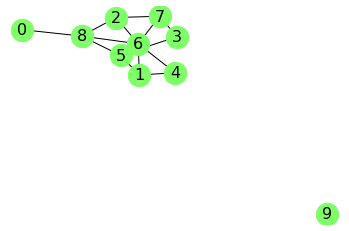

In [19]:
G = nx.gnm_random_graph(10, 20)
G = nx.erdos_renyi_graph(10, 0.3)
draw_graph(G)

In [20]:
def dfs_recursive(G, node):
    G.nodes[node]['marked'] = True
    
    for neighbor in G.adj[node]:
        if not G.nodes[neighbor].get('marked'):
            print(f'marking edge: ({node}, {neighbor})')
            G.edges[node, neighbor]['marked'] = True
            
            dfs_recursive(G, neighbor)

In [21]:
clear_marks(G)
dfs_recursive(G, 0)


marking edge: (0, 8)
marking edge: (8, 2)
marking edge: (2, 6)
marking edge: (6, 1)
marking edge: (1, 4)
marking edge: (1, 5)
marking edge: (5, 3)
marking edge: (3, 7)


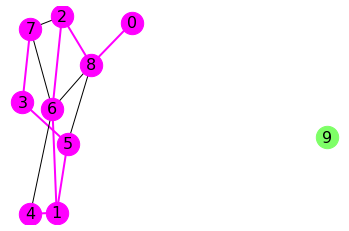

In [23]:
draw_graph(G)

We see that when the original graph is connected the algorithm outputs a spanning tree.

# Iterative solution

In [8]:
def dfs_iterative(graph, node):
    stack = [(None, node)]
    while stack:        
        prev_node, node = stack.pop()
        
        if not graph.nodes[node].get('marked'):
            graph.nodes[node]['marked'] = True
            if prev_node is not None and (prev_node, node) in graph.edges:
                print(f'marking edge: ({prev_node}, {node})')
                graph.edges[prev_node, node]['marked'] = True
                
            prev_node = node
            for neighbor in graph.adj[node]:
                if not graph.nodes[neighbor].get('marked'):
                    stack.append((prev_node, neighbor))
            

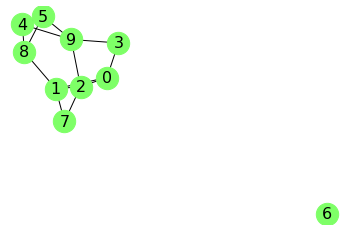

In [9]:
clear_marks(G)
draw_graph(G)

In [10]:
dfs_iterative(G, 0)

marking edge: (0, 3)
marking edge: (3, 9)
marking edge: (9, 5)
marking edge: (5, 8)
marking edge: (8, 4)
marking edge: (8, 1)
marking edge: (1, 7)
marking edge: (7, 2)


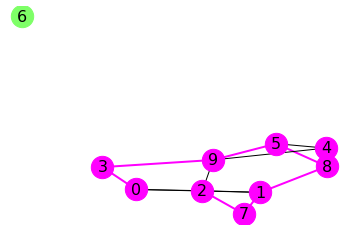

In [14]:
draw_graph(G)